In [1]:
#pip install pmdarima

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv('all-states-history.csv', index_col='date',parse_dates=True)
df.head()

,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,
2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,NaN,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,2676.0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,NaN,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,NaN,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


In [46]:
df.shape

(20780, 40)

In [47]:
df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,19930.000000,9422.000000,20780.000000,7593.000000,12382.000000,12382.000000,17339.000000,20780.000000,3789.000000,11636.000000,...,2.061400e+04,20780.000000,4.789000e+03,3.421000e+03,2200.000000,999.000000,9.197000e+03,2.078000e+04,1.451600e+04,2.078000e+04
mean,3682.216859,3770.182764,24.790712,417.291321,9262.762478,9262.762478,1190.576965,37.360780,1934.191607,359.621176,...,2.186936e+06,17508.388210,1.634028e+05,3.089196e+05,165431.783182,168188.246246,9.650105e+05,2.739554e+03,2.304555e+06,1.296143e+04
std,6281.366321,4157.640633,60.162742,537.625982,12620.544081,12620.544081,2060.041207,208.237151,1953.329983,594.831150,...,4.436508e+06,33586.022461,2.016978e+05,4.232854e+05,178181.836898,143748.073365,1.415215e+06,1.621900e+04,4.445365e+06,3.749509e+04
min,0.000000,0.000000,-201.000000,0.000000,1.000000,1.000000,0.000000,-12257.000000,6.000000,0.000000,...,0.000000e+00,-130545.000000,0.000000e+00,1.000000e+00,1.000000,3.000000,0.000000e+00,-1.043744e+06,0.000000e+00,-1.154583e+06
25%,161.250000,607.000000,0.000000,79.000000,985.250000,985.250000,166.500000,0.000000,501.000000,60.000000,...,1.040498e+05,1205.750000,1.896500e+04,2.004700e+04,54912.750000,37675.500000,1.414700e+05,0.000000e+00,1.324600e+05,0.000000e+00
50%,1108.000000,2409.500000,6.000000,216.000000,4472.000000,4472.000000,531.000000,0.000000,1295.000000,172.000000,...,6.552670e+05,6125.000000,8.465200e+04,1.233840e+05,103967.500000,144130.000000,4.193720e+05,0.000000e+00,7.316510e+05,1.896500e+03
75%,4387.500000,5462.000000,24.000000,460.000000,12248.500000,12248.500000,1279.000000,36.000000,2451.000000,380.000000,...,2.264766e+06,19086.500000,2.300110e+05,4.327270e+05,183103.000000,255251.000000,1.229298e+06,2.478000e+03,2.496925e+06,1.244100e+04
max,54124.000000,21177.000000,2559.000000,2594.000000,82237.000000,82237.000000,22851.000000,16373.000000,9263.000000,5225.000000,...,4.964601e+07,473076.000000,1.054711e+06,2.664340e+06,995580.000000,580372.000000,1.124825e+07,8.208170e+05,4.964601e+07,2.164543e+06


In [48]:
df.columns

Index(['state', 'death', 'deathConfirmed', 'deathIncrease', 'deathProbable',
       'hospitalized', 'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'],
     

In [49]:
df=df[['death', 'deathConfirmed','positive']]

In [50]:
df.corr(method='pearson').style.format("{:2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,death,deathConfirmed,positive
death,1.0,0.997460691170347,0.8809945150478613
deathConfirmed,0.997460691170347,1.0,0.8092630548496431
positive,0.8809945150478613,0.8092630548496431,1.0


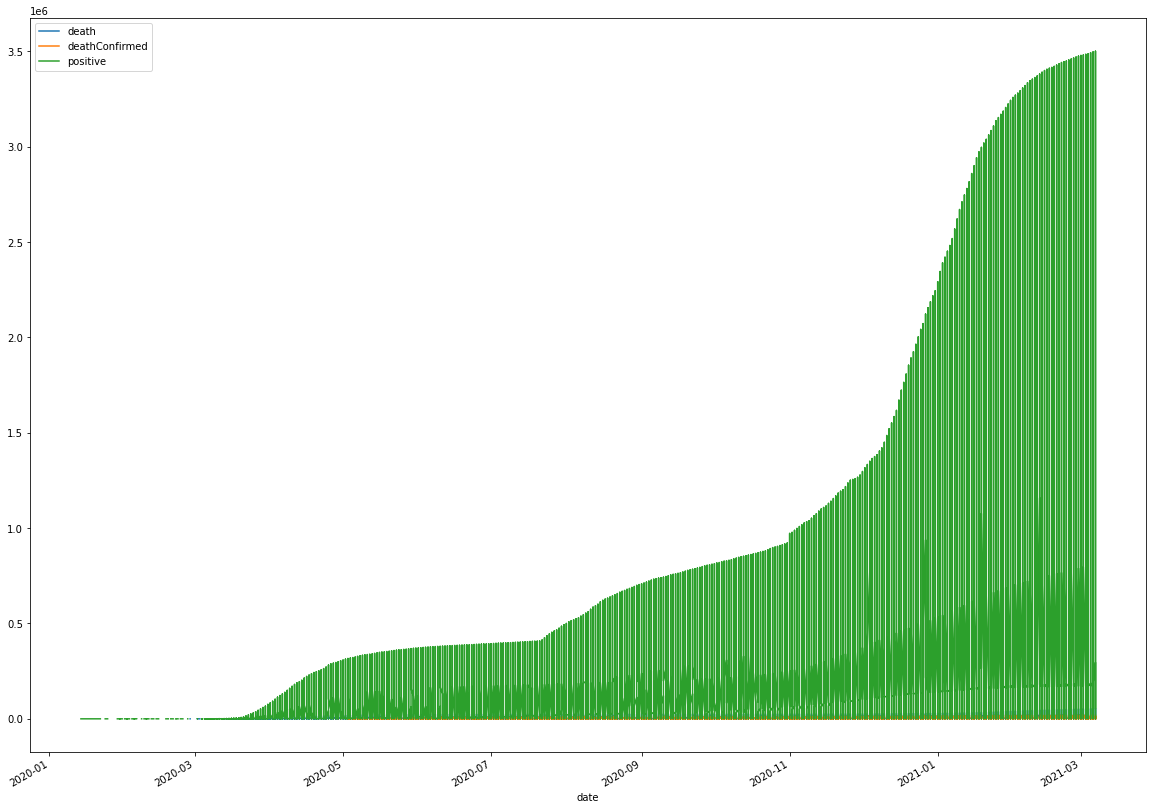

In [51]:
df.plot(figsize=(20,15))

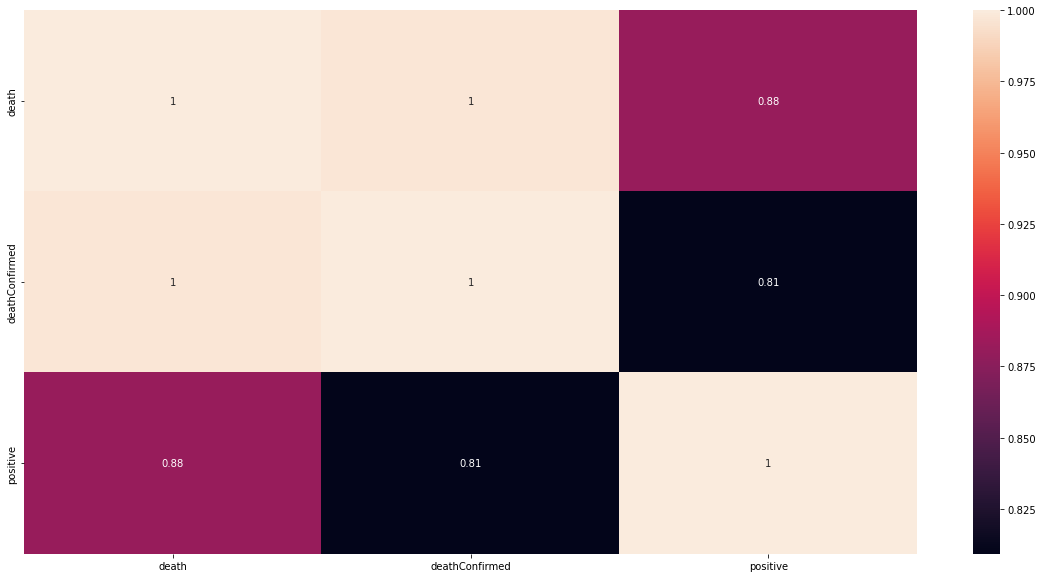

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.savefig("Heatmap.png")

In [24]:
#df['rolling_num'] = df['positiveIncrease'].add(df['positiveIncrease']).cumsum().add(base_value)

In [9]:
df['positive']

date
2021-03-07     56886.0
2021-03-07    499819.0
2021-03-07    324818.0
2021-03-07         0.0
2021-03-07    826454.0
                ...   
2020-01-17         0.0
2020-01-16         0.0
2020-01-15         0.0
2020-01-14         0.0
2020-01-13         NaN
Name: positive, Length: 20780, dtype: float64

In [10]:
az=df.query('state == "AZ"')
type(az)

pandas.core.frame.DataFrame

In [11]:
az=az.iloc[::-1]

In [12]:
pd.set_option('display.max_rows', 500) 

In [159]:
#az['rolling_sum']=az['positiveIncrease'].cumsum()

In [13]:
az

,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,AZ,NaN,NaN,0,NaN,4.0,4.0,NaN,0,NaN,...,33.0,0,0.0,NaN,NaN,NaN,29.0,29,33.0,33
2020-03-05,AZ,NaN,NaN,0,NaN,5.0,5.0,NaN,1,NaN,...,63.0,30,0.0,NaN,NaN,NaN,30.0,1,63.0,30
2020-03-06,AZ,NaN,NaN,0,NaN,6.0,6.0,NaN,1,NaN,...,80.0,17,0.0,NaN,NaN,NaN,36.0,6,80.0,17
2020-03-07,AZ,NaN,NaN,0,NaN,6.0,6.0,NaN,0,NaN,...,117.0,37,0.0,NaN,NaN,NaN,49.0,13,117.0,37
2020-03-08,AZ,NaN,NaN,0,NaN,6.0,6.0,NaN,0,NaN,...,130.0,13,0.0,NaN,NaN,NaN,49.0,0,130.0,13
2020-03-09,AZ,NaN,NaN,0,NaN,8.0,8.0,NaN,2,NaN,...,147.0,17,0.0,NaN,NaN,NaN,49.0,0,147.0,17
2020-03-10,AZ,NaN,NaN,0,NaN,8.0,8.0,NaN,0,NaN,...,222.0,75,0.0,NaN,NaN,NaN,57.0,8,222.0,75
2020-03-11,AZ,NaN,NaN,0,NaN,11.0,11.0,NaN,3,NaN,...,285.0,63,0.0,NaN,NaN,NaN,68.0,11,285.0,63
2020-03-12,AZ,NaN,NaN,0,NaN,16.0,16.0,NaN,5,NaN,...,422.0,137,0.0,NaN,NaN,NaN,91.0,23,422.0,137


In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
from statsmodels.tsa.stattools import adfuller

stat,p,lags,obs,crit,t=adfuller(df['positiveIncrease'])
print('stat-%.3f,p-%.3f'%(stat,p))
if p >0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

stat--5.632,p-0.000
Series is stationary


In [162]:
#az["diff_1"] = az["rolling_sum"].diff(periods=1).dropna()

In [15]:
az

,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,AZ,NaN,NaN,0,NaN,4.0,4.0,NaN,0,NaN,...,33.0,0,0.0,NaN,NaN,NaN,29.0,29,33.0,33
2020-03-05,AZ,NaN,NaN,0,NaN,5.0,5.0,NaN,1,NaN,...,63.0,30,0.0,NaN,NaN,NaN,30.0,1,63.0,30
2020-03-06,AZ,NaN,NaN,0,NaN,6.0,6.0,NaN,1,NaN,...,80.0,17,0.0,NaN,NaN,NaN,36.0,6,80.0,17
2020-03-07,AZ,NaN,NaN,0,NaN,6.0,6.0,NaN,0,NaN,...,117.0,37,0.0,NaN,NaN,NaN,49.0,13,117.0,37
2020-03-08,AZ,NaN,NaN,0,NaN,6.0,6.0,NaN,0,NaN,...,130.0,13,0.0,NaN,NaN,NaN,49.0,0,130.0,13
2020-03-09,AZ,NaN,NaN,0,NaN,8.0,8.0,NaN,2,NaN,...,147.0,17,0.0,NaN,NaN,NaN,49.0,0,147.0,17
2020-03-10,AZ,NaN,NaN,0,NaN,8.0,8.0,NaN,0,NaN,...,222.0,75,0.0,NaN,NaN,NaN,57.0,8,222.0,75
2020-03-11,AZ,NaN,NaN,0,NaN,11.0,11.0,NaN,3,NaN,...,285.0,63,0.0,NaN,NaN,NaN,68.0,11,285.0,63
2020-03-12,AZ,NaN,NaN,0,NaN,16.0,16.0,NaN,5,NaN,...,422.0,137,0.0,NaN,NaN,NaN,91.0,23,422.0,137


In [216]:
from statsmodels.tsa.stattools import adfuller

stat,p,lags,obs,crit,t=adfuller(az[''])
print('stat-%.3f,p-%.3f'%(stat,p))
if p >0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

stat--0.272,p-0.929
Series is not stationary


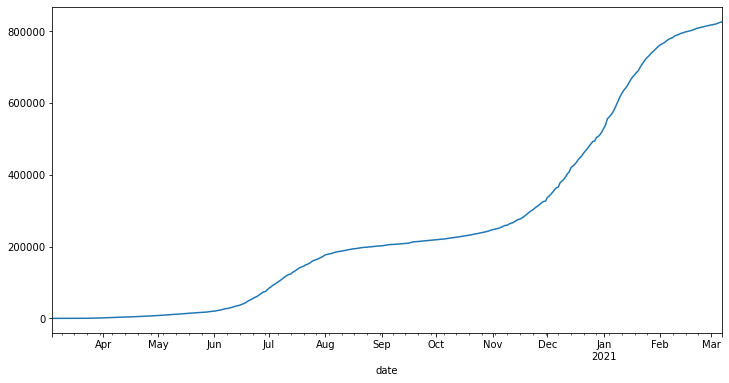

In [16]:
az['positive'].plot(figsize=(12,6))

In [18]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [19]:
fit=auto_arima(az['positive'],trace=True,suppress_warnings=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=6296.274, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6508.030, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=6378.991, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=6308.837, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=6294.505, Time=0.18 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=6304.014, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=6304.976, Time=0.04 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=6296.307, Time=0.38 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=6305.460, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=6306.788, Time=0.07 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=6295.025, Time=0.36 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=6296.465, Time=0.48 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 2.085 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  369
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -3143.252
Date:                Fri, 28 Jan 2022   AIC                           6294.505
Time:                        11:09:02   BIC                           6310.126
Sample:                             0   HQIC                          6300.712
                                - 369                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7071      0.072      9.807      0.000       0.566       0.848
ma.L1         -1.6178      0.062    -26.155      0.000      -1.739      -1.497
ma.L2          0.7190      0.047     15.158      0.000       0.626       0.812
sigma2      1.641e+06   4.18e+04     39.281      0.000    1.56e+06    1.72e+06
===================================================================================
Ljung-Box (Q):                      104.82   Jarque-Bera (JB):              5711.11
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              19.99   Skew:                             2.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
#x=pd.read_csv('all-states-history.csv',index_col='date',parse_dates=True,usecols=['date','state','positiveIncrease'])
#x

In [184]:
az=x.query('state == "AZ"')
ak=x.query('state == "AK"')
wa=x.query('state == "WA"')

In [185]:
az=az.iloc[::-1]
ak=ak.iloc[::-1]
wa=wa.iloc[::-1]

In [188]:
ak.shape

(367, 2)

In [189]:
wa.shape

(420, 2)

In [21]:
az_train=az[['positive']]
az_test=az[['positive']]
print(az_train.shape,az_test.shape)

(369, 1) (369, 1)


In [22]:
az_train=az_train[0:319]
az_test=az_test[319:]
az_test.count()

positive    50
dtype: int64

In [23]:
len(az_train)

319

In [24]:
len(az_test)

50

In [25]:
#az_test=az_test.to_frame()
az_test

,positive
date,
2021-01-17,673882.0
2021-01-18,679282.0
2021-01-19,685699.0
2021-01-20,690544.0
2021-01-21,699942.0
2021-01-22,708041.0
2021-01-23,715357.0
2021-01-24,722574.0
2021-01-25,727895.0


In [30]:
#az_train=az_train.to_frame()
az_train

,positive
date,
2020-03-04,2.0
2020-03-05,2.0
2020-03-06,3.0
2020-03-07,5.0
2020-03-08,5.0
2020-03-09,5.0
2020-03-10,6.0
2020-03-11,9.0
2020-03-12,9.0


In [40]:
model1=ARIMA(az_train,order=(1,2,2))
model1_fit=model1.fit()
model1_fit.summary()

AttributeError: 'pandas._libs.properties.CachedProperty' object has no attribute 'func'

In [264]:
start=len(az_train)
end=len(az_train)+len(az_test)
pred=model_fit.predict(start=start,end=end,typ='levels')
#pred.index=az.index[start:end+1]

In [267]:
print(pred)

2021-01-17    8787.132337
2021-01-18    8620.246796
2021-01-19    8529.259148
2021-01-20    8480.823702
2021-01-21    8459.555087
2021-01-22    8455.537643
2021-01-23    8462.477142
2021-01-24    8476.375797
2021-01-25    8494.694469
2021-01-26    8515.820456
2021-01-27    8538.729474
2021-01-28    8562.770959
2021-01-29    8587.531716
2021-01-30    8612.749310
2021-01-31    8638.257058
2021-02-01    8663.949092
2021-02-02    8689.758174
2021-02-03    8715.641598
2021-02-04    8741.572238
2021-02-05    8767.532868
2021-02-06    8793.512545
2021-02-07    8819.504319
2021-02-08    8845.503778
2021-02-09    8871.508116
2021-02-10    8897.515554
2021-02-11    8923.524960
2021-02-12    8949.535617
2021-02-13    8975.547068
2021-02-14    9001.559023
2021-02-15    9027.571299
2021-02-16    9053.583778
2021-02-17    9079.596387
2021-02-18    9105.609077
2021-02-19    9131.621820
2021-02-20    9157.634596
2021-02-21    9183.647393
2021-02-22    9209.660203
2021-02-23    9235.673021
2021-02-24  

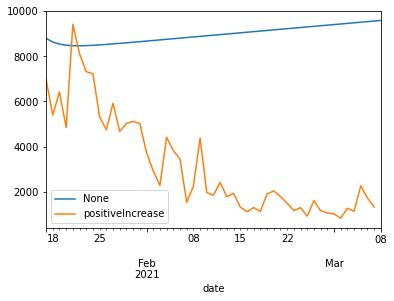

In [246]:
plt.subplots()
pred.plot(legend=True)
az_test.plot(legend=True)

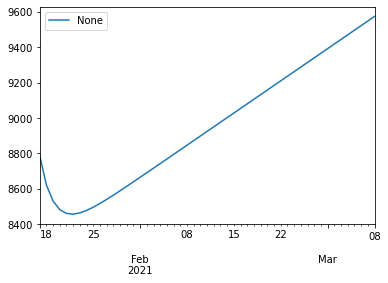

In [247]:
pred.plot(legend=True)

In [252]:
ak_train=ak['positiveIncrease']
ak_test=ak['positiveIncrease']
print(ak_train.shape,ak_test.shape)
wa_train=wa['positiveIncrease']
wa_test=wa['positiveIncrease']
print(wa_train.shape,wa_test.shape)

(367,) (367,)
(420,) (420,)


In [253]:
ak_train=ak_train[0:317]
ak_test=ak_test[317:]
wa_train=wa_train[0:370]
wa_test=wa_test[370:]
len(ak_test)

50

In [259]:
model=ARIMA(ak_train,order=(2,1,2))
model_fit=model.fit(disp=0)
model_fit.summary()

start=len(ak_train)
end=len(ak_train)+len(ak_test)
pred=model_fit.predict(start=start,end=end,typ='levels')

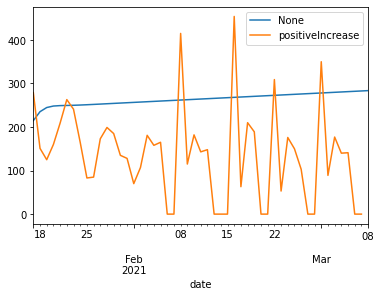

In [260]:
plt.subplots()
pred.plot(legend=True)
ak_test.plot(legend=True)

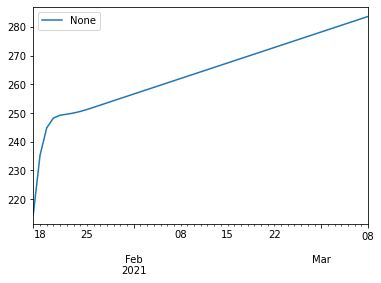

In [261]:
pred.plot(legend=True)

In [256]:
model=ARIMA(wa_train,order=(2,1,2))
model_fit=model.fit(disp=0)
model_fit.summary()

start=len(wa_train)
end=len(wa_train)+len(wa_test)
pred=model_fit.predict(start=start,end=end,typ='levels')

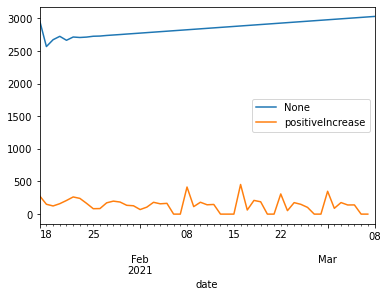

In [257]:
plt.subplots()
pred.plot(legend=True)
ak_test.plot(legend=True)

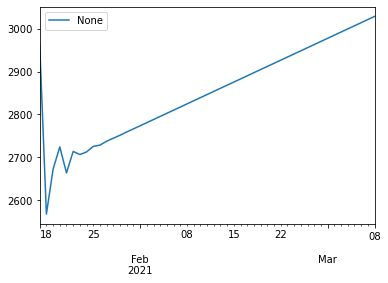

In [258]:
pred.plot(legend=True)